In [30]:
import numpy as np

from Code.Torsh.TorchMacsumAggregationLearning import *
from Code.Torsh.Torsh_data_generation import *
from Code.Torsh.NetowrkMacsum import  MacsumSigmoidTorchV2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
N = 100
# C'est le vrai noyau que l'on va essayer de retrouver
phi_true = np.random.uniform(low=-10.0, high=10.0, size=N) 
macsum_true = Macsum(N,phi_true)
print("True Kernel : ",phi_true)

True Kernel :  [ 2.62546002  6.71737369 -8.71259039  1.59017578  3.30526028  8.83491956
  4.51348709  9.4476129  -1.87632123 -2.39826967 -9.57471121  9.5104296
  9.23068495 -7.35657166  4.62593479  0.94046036 -6.32142544  8.53101177
  5.95510055 -0.53084502  0.84940862 -4.13588053  0.75165028  0.27822224
  2.48379727 -6.84990098 -4.94511029  4.43501249 -6.08529824 -1.31644182
  6.55377765 -3.80420331  7.26076443 -8.86467977  5.34462473 -7.14706353
  0.44747387  3.85909626  1.44092951  6.88202323 -4.08309848  7.65140506
 -2.69929629 -9.40426694  7.14960658 -3.19217464 -6.5307668  -2.03703717
 -6.09546049  0.21683589 -5.31923708  7.67247792 -6.82661605 -4.18366264
 -0.47477028  3.50510295  0.69418739  4.20116289  3.62678866  2.35989187
  9.0279885   1.33647762 -0.11140737 -0.9911569   1.30454948 -3.22691894
 -8.25474914  5.1734477   7.45442212 -8.60277816  8.88294512  5.78813532
  0.24082925  5.36588996  5.81969783 -1.38439637 -8.47598734  0.28912208
 -2.47380926  0.59865195 -4.27749628 

In [32]:
n_samples = 1000
X,Y = generate_data(macsum_true,phi_true,n_samples=n_samples,noise_level=0.0,borne=100,generation="gauss",multi=1)
five_percent = int(n_samples * 0.05)
X_eval = np.concatenate([X[:five_percent], X[-five_percent:]], axis=0)
Y_eval = np.concatenate([Y[:five_percent], Y[-five_percent:]], axis=0)
X,Y = X[five_percent:-five_percent],Y[five_percent:-five_percent]
X_eval, Y_eval = np.concatenate([X[:five_percent], X[-five_percent:]], axis=0), np.concatenate([Y[:five_percent], Y[-five_percent:]], axis=0)

In [15]:
plot_3d_points(X,Y)

In [16]:
true_metric = evaluate_model_complet(X,Y,macsum_true)

In [41]:
model_SPIL =  MacsumSigmoidTorchV2(X.shape[1],alpha=0.1,gamma_upper=0.99,gamma_lower=0.99,k_sigmoid=0.1)
#multi = cross_validate_macsum(model_SPIL,X,Y,5,n_epochs = 3000,learning_rate=1e-3,epsilon_conv=1e-5,batch_size=256,beta1=0.8,beta2=0.99,phi_true=phi_true)
model_SPIL.fit_adam(X,Y,X_eval,Y_eval,learning_rate=1e-3,epsilon_conv=1e-4,n_epochs = 1500,beta1=0.8,beta2=0.99,batch_size=256,phi_true_for_eval=phi_true)

Starting PyTorch Adam training (MacsumSigmoidTorchV2 with Manual Gradient for Phi)...


Adam Training (MacsumSigmoidTorchV2 Manual Grad): 100%|██████████| 1500/1500 [00:16<00:00, 90.50it/s]

Training finished for MacsumSigmoidTorchV2 (max epochs reached or converged earlier via manual grad fit_adam).


array([-0.87698584, -0.36013445, -2.60358036,  0.70164389,  0.83444328,
        1.63682406,  3.04524639,  2.2471472 ,  0.18216937,  3.84106424,
        0.11786035,  3.34759163,  3.54294838, -3.58070752,  2.82308877,
        0.02798276, -1.46355003,  0.81710795,  1.36723482, -0.45477537,
       -2.5793328 , -0.06333266, -0.72111049,  0.46745125,  2.14257189,
        3.57941337, -4.2180506 ,  0.45855597, -1.02908454, -0.0106201 ,
        1.44432359, -3.3391004 ,  4.59340095, -2.90748142,  1.38138336,
       -0.85082022,  0.37215053,  0.77202893,  2.65973777,  2.04714433,
       -0.70634737,  1.71582366, -0.70578805, -0.14025034,  0.83497672,
        2.31551819, -0.02696714, -4.0161389 , -2.25209341, -3.92860216,
        2.32880634, -3.26628668, -1.0979802 , -0.87458956,  0.02946265,
        0.96390896, -2.72217384,  2.84744504,  2.91222055,  0.13760181,
        3.0021937 ,  0.87659285, -1.0667683 , -3.18313929,  0.58454593,
       -0.21660168, -0.027932  , -2.15626711,  0.7719666 ,  0.47

In [23]:
model_IMSE = Macsum(N)
#multi_IMSE = cross_validate_macsum(model_IMSE,X,Y,5,n_epochs = 3000,learning_rate=1e-3,epsilon_conv=1e-5,batch_size=256,beta1=0.8,beta2=0.99,phi_true=phi_true)
model_IMSE.fit_adam(X,Y,X_eval,Y_eval,learning_rate=1e-4,epsilon_conv=1e-6,n_epochs = 1500,beta1=0.8,beta2=0.99,batch_size=256,phi_true_for_eval=phi_true)

Starting PyTorch Adam training (Macsum with Manual Gradient for Phi)...


Adam Training (Macsum Manual Grad):  12%|█▏        | 179/1500 [00:03<00:28, 47.17it/s]


KeyboardInterrupt: 

   metrics_to_plot = [
        'avg_train_loss', 'avg_eval_loss', 'containment_rate',
        'avg_interval_spread', 'avg_misp_distance', 'phi_distance_l2',
        "median_interval_spread", "q95_interval_spread"  
    ]

In [34]:
i=780
print(np.mean(abs(Y)))
model_SPIL.forward( torch.tensor(X[i], dtype=torch.float64)) 

93.47049793061421


(tensor(-248.6212, dtype=torch.float64), tensor(221.1004, dtype=torch.float64))

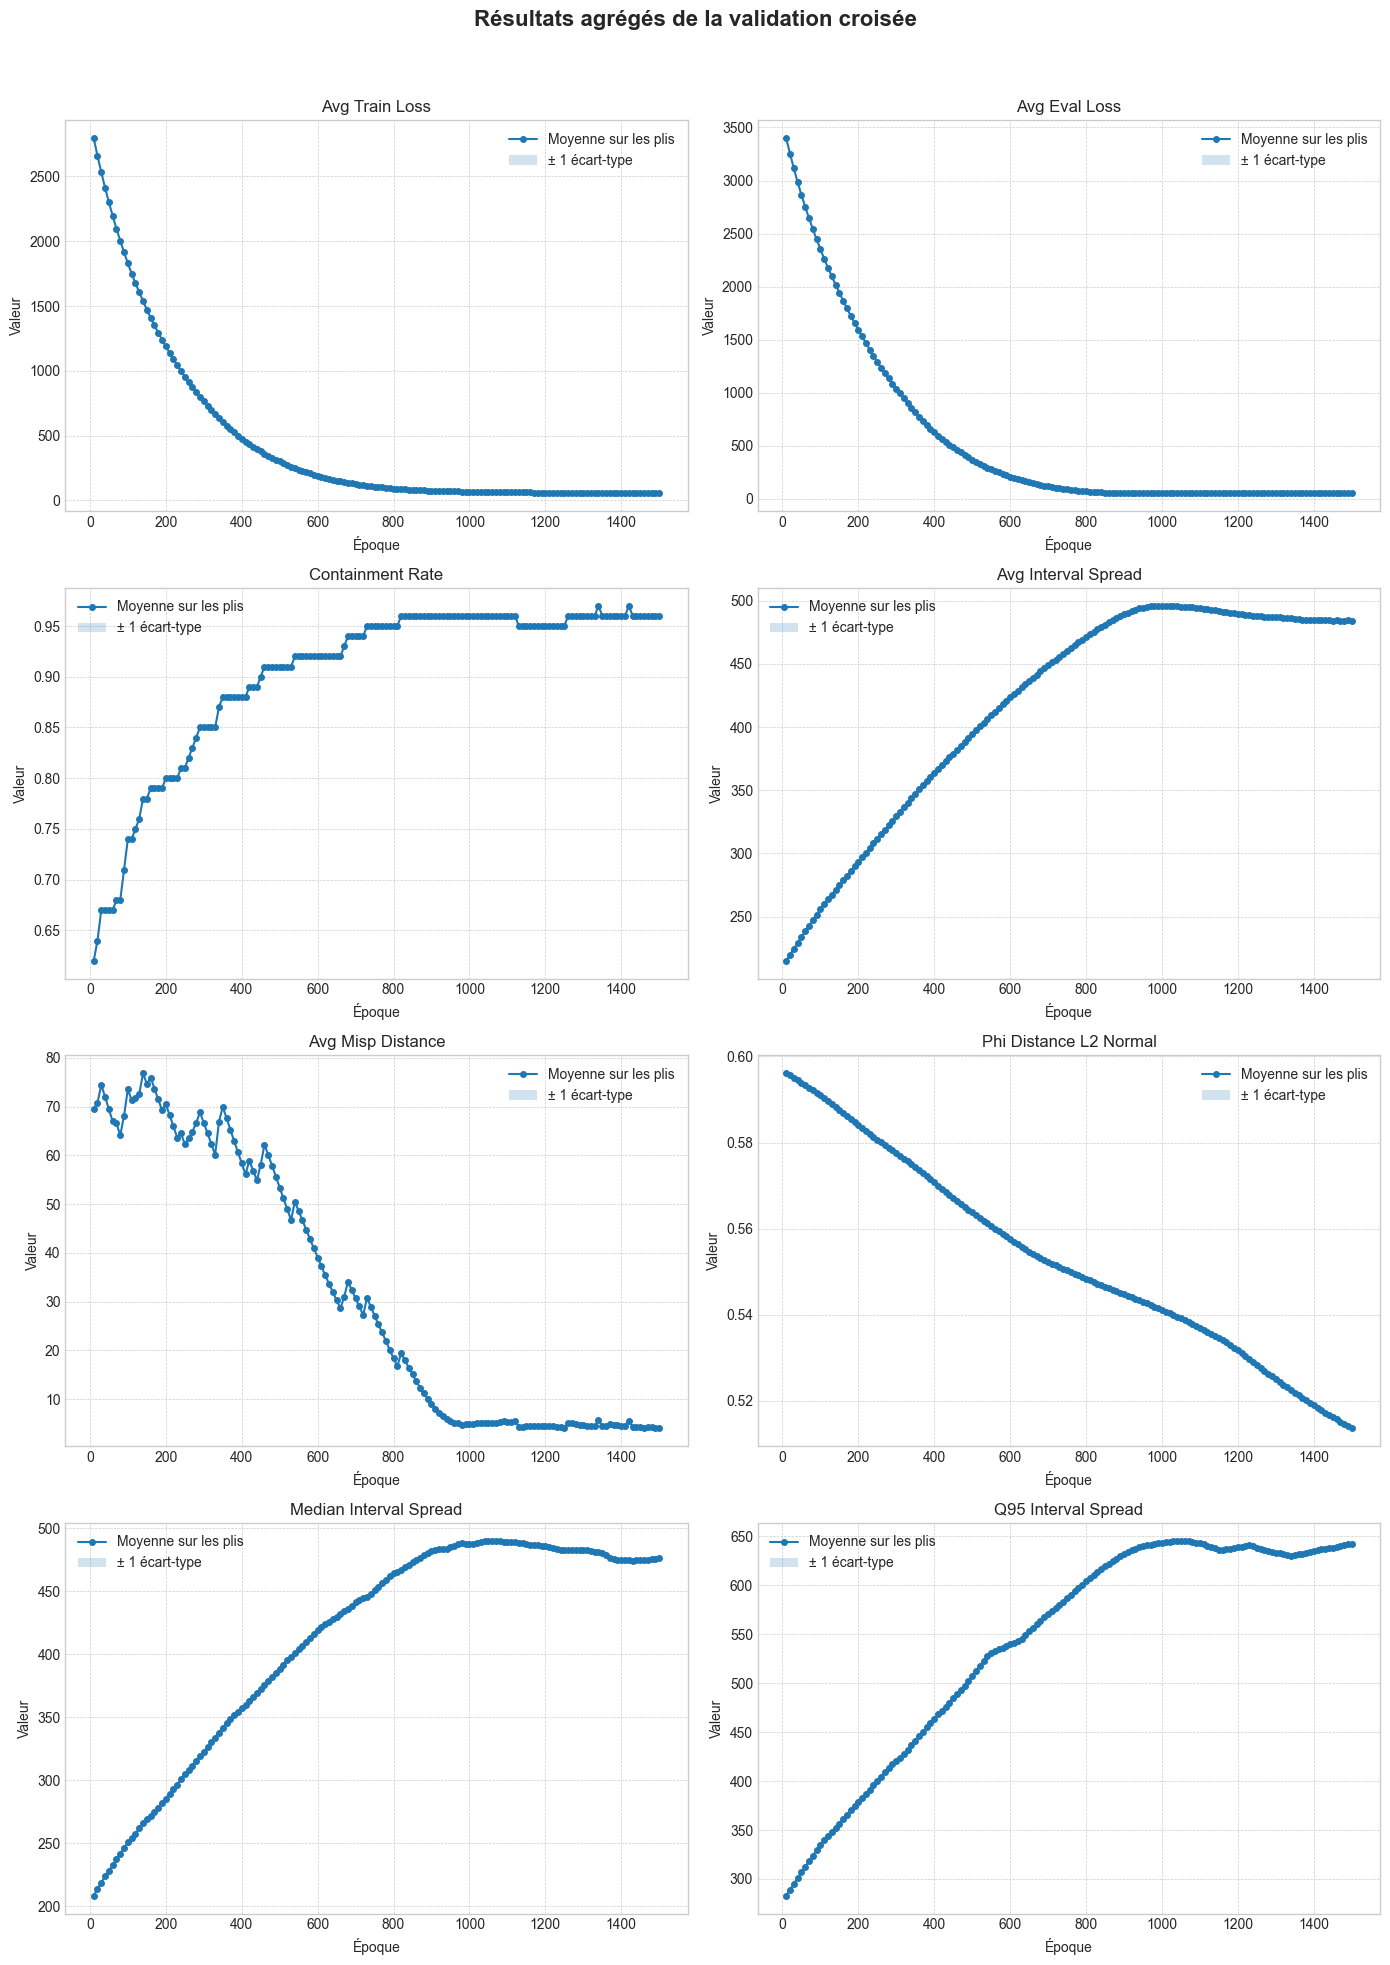

In [42]:
plot_metrics_complet([model_SPIL.history,model_SPIL.history])

In [ ]:
plot_metrics_complet(list_of_histories=multi)
plot_metrics_complet(list_of_histories=multi_IMSE)

   metrics_to_plot = [
        'avg_train_loss', 'avg_eval_loss', 'containment_rate',
        'avg_interval_spread', 'avg_misp_distance', 'phi_distance_l2_normal',
        "median_interval_spread", "q95_interval_spread"  
    ]

In [ ]:
info = "median_interval_spread" 
plot_multiple_histories_by_key(multi_IMSE,key_to_plot=info,reference_value=true_metric[info])
plot_multiple_histories_by_key (multi,key_to_plot=info,reference_value=true_metric[info])

In [ ]:
info = "containment_rate"
plot_multiple_histories_by_key(multi_IMSE,key_to_plot=info,reference_value=true_metric[info])
plot_multiple_histories_by_key (multi,key_to_plot=info,reference_value=true_metric[info])

In [ ]:
info = "q95_interval_spread" 
plot_multiple_histories_by_key(multi_IMSE,key_to_plot=info,reference_value=true_metric[info])
plot_multiple_histories_by_key (multi,key_to_plot=info,reference_value=true_metric[info])

In [43]:
from sklearn.metrics import mean_squared_error
# Conversion de X en tenseur torch
X_tensor = torch.tensor(X, dtype=torch.float64)
# Appel du modèle une seule fois
tops, bots = model_SPIL.forward(X_tensor) 

# Moyenne élément par élément
Y_pred = ((tops + bots) / 2).numpy()
Y_pred_bot,Y_pred_top = tops,bots
rmsle = np.sqrt( mean_squared_error(Y, Y_pred))
rmsle_t = np.sqrt(mean_squared_error(Y, Y_pred_top))
rmsle_b = np.sqrt(mean_squared_error(Y, Y_pred_bot))
print("RMSLE =", rmsle,rmsle_b,rmsle_t)

RMSLE = 103.48496948989383 262.80412034507293 267.40615343835276
